<a href="https://colab.research.google.com/github/Ax3l2710/Portofolio/blob/main/CUSTOMER_RETENTION_PADI_UMKM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PADI UMKM

Please find data that we will use for analytics:
- Order Details: https://drive.google.com/file/d/1DYS5c27VcJOkQr2VmIjJIrHhQDqvqioU/view?usp=share_link
- Order Transaction: https://drive.google.com/file/d/1VpxJMK6ZJBsyy8eApHCACjhfFusvlJZZ/view?usp=share_link
- Products: https://drive.google.com/file/d/1oRzmLytWNTzJ_zWfcOyC7Cwrdw10Oh9C/view?usp=share_link
- Users: https://drive.google.com/file/d/18V1efasan0efz5et1TgjSGq_wcYTc6k2/view?usp=share_link

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
import matplotlib.pyplot as plt     # To perform data visualization
import plotly.graph_objects as go   # To perform graph visualization
import seaborn as sns               # To perform data visualization
from datetime import datetime       # Used to perform dates and time manipulation

In [ ]:
!pip install gdown # Install gdown

In [ ]:
import gdown # Import gdown

In [ ]:
url2 = "https://drive.google.com/file/d/1VpxJMK6ZJBsyy8eApHCACjhfFusvlJZZ/view?usp=share_link"
output2 = 'order_transaction.csv' # Import dataset to google colab
gdown.download(url2, output2, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1VpxJMK6ZJBsyy8eApHCACjhfFusvlJZZ
To: /content/order_transaction.csv
100%|██████████| 24.2M/24.2M [00:00<00:00, 64.8MB/s]


'order_transaction.csv'

In [ ]:
# To import data from CSV file, we can use `pd.read_csv('filename.csv')` function
# Let's import it and store it as "df" variable

df_order_transaction = pd.read_csv('/content/order_transaction.csv',low_memory=False)
df_order_transaction .head()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2022-12-12-8804434,12/12/2022,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2022-10-11-4866339,10/11/2022,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2022-12-08-7257980,12/8/2022,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2022-04-18-108977,4/18/2022,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2022-12-13-1031978,12/13/2022,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


In [ ]:
df_order_transaction .tail()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
159128,PO-2022-06-16-128661,6/16/2022,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,NaN,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2022-11-30-4342388,11/30/2022,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,NaN,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2022-06-07-123774,6/7/2022,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,NaN,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2022-07-21-143881,7/21/2022,293510,Selesai,Direct,QREN,self,0,6500,0.0,NaN,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e
159132,PO-2022-11-30-5473461,11/30/2022,455203,Selesai,Direct,QREN,self,0,27000,0.0,NaN,202,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


In [ ]:
df_order_transaction .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            159133 non-null  object 
 1   transaction_date     159133 non-null  object 
 2   order_id             159133 non-null  int64  
 3   order_status         159133 non-null  object 
 4   payment_group        159133 non-null  object 
 5   payment_method       159133 non-null  object 
 6   shipping_agency      159133 non-null  object 
 7   shipping_cost        159133 non-null  int64  
 8   total_project_value  159133 non-null  int64  
 9   voucher_val          68399 non-null   float64
 10  voucher_code         5160 non-null    object 
 11  revenue              159133 non-null  int64  
 12  seller_id            159127 non-null  object 
 13  seller_category      159127 non-null  object 
 14  buyer_id             159133 non-null  object 
dtypes: float64(1), in

## CLEANING PROCESS

### MISSING VALUE

In [ ]:
# Check Missing Value in dataset
print("Missing Values in dataset:")
print(df_order_transaction.isnull().sum())

Missing Values in dataset:
po_number                   0
transaction_date            0
order_id                    0
order_status                0
payment_group               0
payment_method              0
shipping_agency             0
shipping_cost               0
total_project_value         0
voucher_val             90734
voucher_code           153973
revenue                     0
seller_id                   6
seller_category             6
buyer_id                    0
dtype: int64


In [ ]:
# Check how much null values exist
round(df_order_transaction.isnull().sum() / len(df_order_transaction) * 100,2)

po_number               0.00
transaction_date        0.00
order_id                0.00
order_status            0.00
payment_group           0.00
payment_method          0.00
shipping_agency         0.00
shipping_cost           0.00
total_project_value     0.00
voucher_val            57.02
voucher_code           96.76
revenue                 0.00
seller_id               0.00
seller_category         0.00
buyer_id                0.00
dtype: float64

### UNIQUE VALUE

In [ ]:
# Check unique values in every column
# Check with Data Dictionary
for col in df_order_transaction.columns:
  print(col)
  print(df_order_transaction[col].value_counts())
  print('\n') # Give 1 new line (enter)

po_number
PO-2022-12-12-8804434    1
PO-2022-02-21-88908      1
PO-2022-09-28-9103188    1
PO-2022-03-04-91728      1
PO-2022-10-07-1628239    1
                        ..
PO-2022-11-16-8864734    1
PO-2022-12-27-4090504    1
PO-2022-02-21-88811      1
PO-2022-02-10-85759      1
PO-2022-11-30-5473461    1
Name: po_number, Length: 159133, dtype: int64


transaction_date
10/12/2022    2517
10/11/2022    2198
12/12/2022    1981
12/13/2022    1792
10/10/2022    1444
              ... 
5/7/2022         5
1/2/2022         3
1/9/2022         2
9/17/2022        1
5/2/2022         1
Name: transaction_date, Length: 363, dtype: int64


order_id
463776    1
102449    1
416545    1
263241    1
423212    1
         ..
445117    1
474442    1
203037    1
245470    1
455203    1
Name: order_id, Length: 159133, dtype: int64


order_status
Selesai                       136991
Dibatalkan                      4979
Ditolak Penjual                 4381
Expired                         4254
Menunggu Pembayara

### DATE TIME FORMAT

In [ ]:
# Change date data type from string to date time
df_order_transaction['transaction_date'] = pd.to_datetime(df_order_transaction['transaction_date'])
df_order_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            159133 non-null  object        
 1   transaction_date     159133 non-null  datetime64[ns]
 2   order_id             159133 non-null  int64         
 3   order_status         159133 non-null  object        
 4   payment_group        159133 non-null  object        
 5   payment_method       159133 non-null  object        
 6   shipping_agency      159133 non-null  object        
 7   shipping_cost        159133 non-null  int64         
 8   total_project_value  159133 non-null  int64         
 9   voucher_val          68399 non-null   float64       
 10  voucher_code         5160 non-null    object        
 11  revenue              159133 non-null  int64         
 12  seller_id            159127 non-null  object        
 13  seller_categor

In [ ]:
df_order_transaction.head()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2022-12-12-8804434,2022-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2022-12-08-7257980,2022-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2022-04-18-108977,2022-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2022-12-13-1031978,2022-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


In [ ]:
df_order_transaction.tail()

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
159128,PO-2022-06-16-128661,2022-06-16,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,NaN,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2022-11-30-4342388,2022-11-30,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,NaN,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,NaN,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2022-07-21-143881,2022-07-21,293510,Selesai,Direct,QREN,self,0,6500,0.0,NaN,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e
159132,PO-2022-11-30-5473461,2022-11-30,455203,Selesai,Direct,QREN,self,0,27000,0.0,NaN,202,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


### DUPLICATED VALUE

In [ ]:
# Check duplicate all table
df_order_transaction[df_order_transaction.duplicated()]

,po_number,transaction_date,order_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id


## EXPLORATORY DATA ANALYSIS 1

In [ ]:
#Total Revenue
total_revenue = df_order_transaction['revenue'].sum()
print("Total Revenue =",total_revenue.sum())

Total Revenue = 24280815963


In [ ]:
#Total Project Value
total_project_value = df_order_transaction['total_project_value'].sum()
print("Total Project Value =",total_project_value.sum())

Total Project Value = 3747316980028


In [ ]:
#Total Order
total_order = df_order_transaction['order_id'].count()
print("Total Order =",total_order.sum())

Total Order = 159133


In [ ]:
#Average Revenue / Order
average_revenue = df_order_transaction['revenue'].sum() / df_order_transaction['order_id'].count()
print("Average Revenue / Order =",average_revenue)

Average Revenue / Order = 152581.90295538952


In [ ]:
#Average Project Value / Order
average_project_value = df_order_transaction['total_project_value'].sum() / df_order_transaction['order_id'].count()
print("Average Project Value / Order =",average_project_value)

Average Project Value / Order = 23548333.658185292


## COHORT ANALYSIS (BUYER)

In [ ]:
# Final end-of-month (EOM) balance is the last transaction of each client on each months
customer_retention = df_order_transaction.sort_values(by=['buyer_id','transaction_date','order_id'], ascending=[False,True,False])
customer_retention = customer_retention.groupby(['buyer_id',pd.Grouper(key='transaction_date', freq='D')]).last()[['order_status','revenue']]
customer_retention = customer_retention.reset_index()
customer_retention

,buyer_id,transaction_date,order_status,revenue
0,631a4da47255a77e0e6d7410,2022-01-04,Selesai,1650
1,631a4da47255a77e0e6d7410,2022-01-10,Dibatalkan,1275
2,631a4da47255a77e0e6d7410,2022-01-12,Dibatalkan,375
3,631a4da47255a77e0e6d7410,2022-01-14,Selesai,75
4,631a4da47255a77e0e6d7410,2022-01-19,Selesai,1650
...,...,...,...,...
129128,63b0642410d7d4a770888d88,2022-03-25,Selesai,774
129129,63b0643d10d7d4a770888e72,2022-12-28,Diterima,774
129130,63b0656910d7d4a770889040,2022-07-06,Selesai,774
129131,63b0657e031d7b3fee1ab87d,2022-11-03,Selesai,774


In [ ]:
#Get Transaction Month for the dataframe
import datetime as dt

def get_date_int(x) :
    return dt.datetime(x.year, x.month,1)

customer_retention['transaction_date'] = pd.to_datetime(customer_retention['transaction_date'])
customer_retention['transaction_month'] = customer_retention['transaction_date'].apply(get_date_int)
customer_retention.head()

,buyer_id,transaction_date,order_status,revenue,transaction_month
0,631a4da47255a77e0e6d7410,2022-01-04,Selesai,1650,2022-01-01
1,631a4da47255a77e0e6d7410,2022-01-10,Dibatalkan,1275,2022-01-01
2,631a4da47255a77e0e6d7410,2022-01-12,Dibatalkan,375,2022-01-01
3,631a4da47255a77e0e6d7410,2022-01-14,Selesai,75,2022-01-01
4,631a4da47255a77e0e6d7410,2022-01-19,Selesai,1650,2022-01-01


In [ ]:
customer_retention.tail()

,buyer_id,transaction_date,order_status,revenue,transaction_month
129128,63b0642410d7d4a770888d88,2022-03-25,Selesai,774,2022-03-01
129129,63b0643d10d7d4a770888e72,2022-12-28,Diterima,774,2022-12-01
129130,63b0656910d7d4a770889040,2022-07-06,Selesai,774,2022-07-01
129131,63b0657e031d7b3fee1ab87d,2022-11-03,Selesai,774,2022-11-01
129132,63b0659310d7d4a77088905e,2022-06-10,Selesai,774,2022-06-01


In [ ]:
#Create Cohort Month per Rows

group = customer_retention.groupby('buyer_id')['transaction_month']
customer_retention['cohort_month'] = group.transform('min')

customer_retention[customer_retention['buyer_id'] == '63b0642410d7d4a770888d88']

,buyer_id,transaction_date,order_status,revenue,transaction_month,cohort_month
129128,63b0642410d7d4a770888d88,2022-03-25,Selesai,774,2022-03-01,2022-03-01


In [ ]:
#Calculate Cohort Index for Each Rows

def get_date_int(customer_retention, column) :
    year = customer_retention[column].dt.year
    month = customer_retention[column].dt.month
    day = customer_retention[column].dt.day

    return year, month, day

transaction_year, transaction_month, transaction_day = get_date_int(customer_retention, 'transaction_month')
cohort_year, cohort_month, cohort_day = get_date_int(customer_retention,'cohort_month')

In [ ]:
#Calculate Year Differences
years_diff = transaction_year - cohort_year

#Calculate Month Differences
months_diff = transaction_month - cohort_month

customer_retention['cohort_index'] = years_diff*12 + months_diff + 1

customer_retention.head()

,buyer_id,transaction_date,order_status,revenue,transaction_month,cohort_month,cohort_index
0,631a4da47255a77e0e6d7410,2022-01-04,Selesai,1650,2022-01-01,2022-01-01,1
1,631a4da47255a77e0e6d7410,2022-01-10,Dibatalkan,1275,2022-01-01,2022-01-01,1
2,631a4da47255a77e0e6d7410,2022-01-12,Dibatalkan,375,2022-01-01,2022-01-01,1
3,631a4da47255a77e0e6d7410,2022-01-14,Selesai,75,2022-01-01,2022-01-01,1
4,631a4da47255a77e0e6d7410,2022-01-19,Selesai,1650,2022-01-01,2022-01-01,1


In [ ]:
customer_retention.tail()

,buyer_id,transaction_date,order_status,revenue,transaction_month,cohort_month,cohort_index
129128,63b0642410d7d4a770888d88,2022-03-25,Selesai,774,2022-03-01,2022-03-01,1
129129,63b0643d10d7d4a770888e72,2022-12-28,Diterima,774,2022-12-01,2022-12-01,1
129130,63b0656910d7d4a770889040,2022-07-06,Selesai,774,2022-07-01,2022-07-01,1
129131,63b0657e031d7b3fee1ab87d,2022-11-03,Selesai,774,2022-11-01,2022-11-01,1
129132,63b0659310d7d4a77088905e,2022-06-10,Selesai,774,2022-06-01,2022-06-01,1


In [ ]:
#Final Grouping to Calculate Total Unique Users in Each Cohort
cohort_group = customer_retention.groupby(['cohort_month','cohort_index'])

cohort_data = cohort_group['buyer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot_table(index = 'cohort_month',
                                        columns = 'cohort_index',
                                        values = 'buyer_id'
                                       )

cohort_data.head()

,cohort_month,cohort_index,buyer_id
0,2022-01-01,1,3153
1,2022-01-01,2,1659
2,2022-01-01,3,1988
3,2022-01-01,4,1872
4,2022-01-01,5,1730


In [ ]:
#Calculate Retention rate per Month Index

cohort_size = cohort_counts.iloc[:,0]

retention = cohort_counts.divide(cohort_size, axis = 0)

retention = retention.round(3)*100

retention.index = retention.index.strftime('%Y-%m')

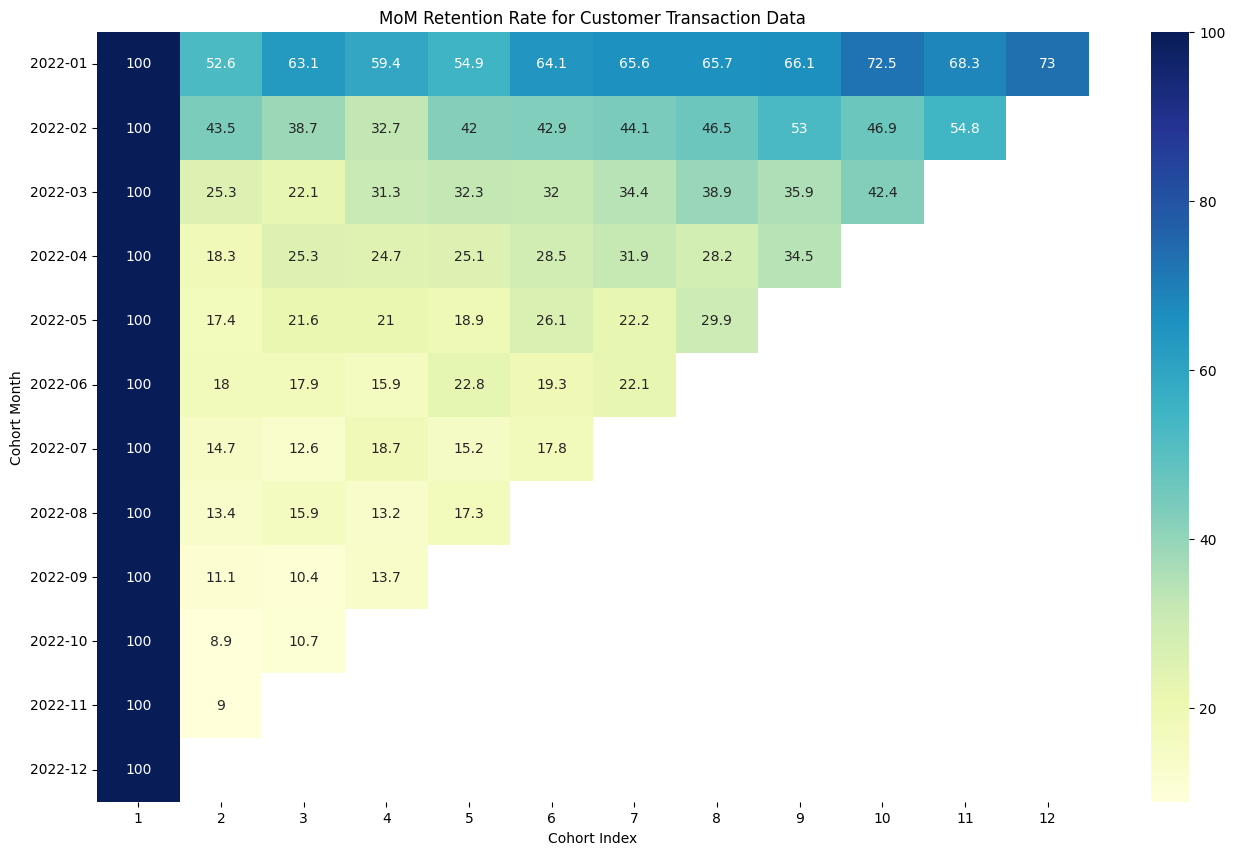

In [ ]:
#Plotting Heatmap for Retention Table

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,10))

plt.title('MoM Retention Rate for Customer Transaction Data')

sns.heatmap(retention, annot = True, cmap="YlGnBu", fmt='g')

plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation = 'horizontal')

plt.show()

# EXPLORATORY DATA ANALYSIS 2

In [ ]:
#Average Order Value
aov_all = df_order_transaction['revenue'].sum() / df_order_transaction['order_id'].count()
print("Average Order Value =",aov_all)

#Average Order Cost
aoc_all = df_order_transaction['total_project_value'].sum() / df_order_transaction['order_id'].count()
print("Average Order Cost =",aoc_all)

#Average Order per Customer
aocu_all = df_order_transaction['order_id'].mean()
print("Average Order per Customer =",aocu_all)


Average Order Value = 152581.90295538952
Average Order Cost = 23548333.658185292
Average Order per Customer = 296754.0089861939


In [ ]:
clv = df_order_transaction.groupby('buyer_id')['revenue'].sum().mean()